In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
features = ["feature "+str(f) for f in range(279)]
df = pd.read_csv('arrhythmia.data', names= features + ['target'])
df = df.replace('?', 0).astype(float)

In [72]:
df.describe()

feature 0   feature 1   feature 2   feature 3   feature 4   feature 5  \
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000   
mean    46.471239    0.550885  166.188053   68.170354   88.920354  155.152655   
std     16.466631    0.497955   37.170340   16.590803   15.364394   44.842283   
min      0.000000    0.000000  105.000000    6.000000   55.000000    0.000000   
25%     36.000000    0.000000  160.000000   59.000000   80.000000  142.000000   
50%     47.000000    1.000000  164.000000   68.000000   86.000000  157.000000   
75%     58.000000    1.000000  170.000000   79.000000   94.000000  175.000000   
max     83.000000    1.000000  780.000000  176.000000  188.000000  524.000000   

        feature 6   feature 7   feature 8   feature 9  ...  feature 270  \
count  452.000000  452.000000  452.000000  452.000000  ...   452.000000   
mean   367.207965  169.949115   90.004425   33.676991  ...    -0.278982   
std     33.385421   35.633072   25.826643   45.431434  ...     0.548876   
min    232.000000  108.000000    0.000000 -172.000000  ...    -4.100000   
25%    350.000000  148.000000   79.000000    3.750000  ...    -0.425000   
50%    367.000000  162.000000   91.000000   40.000000  ...     0.000000   
75%    384.000000  179.000000  102.000000   66.000000  ...     0.000000   
max    509.000000  381.000000  205.000000  169.000000  ...     0.000000   

       feature 271  feature 272  feature 273  feature 274  feature 275  \
count   452.000000   452.000000   452.000000        452.0   452.000000   
mean      9.048009    -1.457301     0.003982          0.0     0.514823   
std       3.472862     2.002430     0.050118          0.0     0.347531   
min       0.000000   -28.600000     0.000000          0.0    -0.800000   
25%       6.600000    -2.100000     0.000000          0.0     0.400000   
50%       8.800000    -1.100000     0.000000          0.0     0.500000   
75%      11.200000     0.000000     0.000000          0.0     0.700000   
max      23.600000     0.000000     0.800000          0.0     2.400000   

       feature 276  feature 277  feature 278      target  
count   452.000000   452.000000   452.000000  452.000000  
mean      1.222345    19.326106    29.473230    0.457965  
std       1.426052    13.503922    18.493927    0.498782  
min      -6.000000   -44.200000   -38.600000    0.000000  
25%       0.500000    11.450000    17.550000    0.000000  
50%       1.350000    18.100000    27.900000    0.000000  
75%       2.100000    25.825000    41.125000    1.000000  
max       6.000000    88.800000   115.900000    1.000000  

[8 rows x 280 columns]

In [32]:
df['target'].value_counts()
# 1 is normal, not ill person.

1.0     245
10.0     50
2.0      44
6.0      25
16.0     22
3.0      15
4.0      15
5.0      13
9.0       9
15.0      5
14.0      4
7.0       3
8.0       2
Name: target, dtype: int64

In [33]:
df['target'] = (df['target']!=1).astype(int)

In [34]:
df['target'].value_counts()

0    245
1    207
Name: target, dtype: int64

 Visualization in 3 dimensions

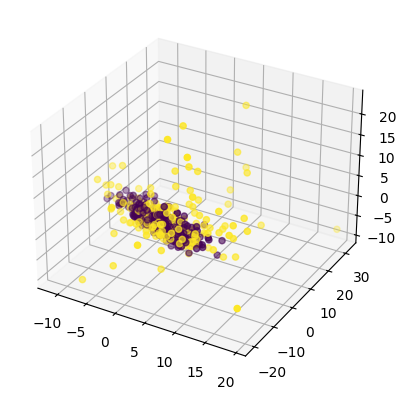

In [144]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
scal = StandardScaler()
X = scal.fit_transform(df[features])
X_transformed = pca.fit_transform(X)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_transformed[:,0], X_transformed[:,1],X_transformed[:,2], c=df["target"])

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

Illustration that KNN is pretty bad in high dimension


In [194]:
clf = KNeighborsClassifier()
print(np.mean(cross_val_score(clf, df[features], df["target"], cv = 10, scoring="accuracy")))

0.6440579710144927


Illustration that without regression, logistic regression is also not great

In [188]:
clf = make_pipeline(StandardScaler(),LogisticRegression(penalty=None))
print(np.mean(cross_val_score(clf, df[features], df["target"], cv = 10, scoring="accuracy")))

0.6902415458937199


L2 and L1 regularization

In [77]:
clf = make_pipeline(StandardScaler(),LogisticRegression(penalty="l2"))
print(np.mean(cross_val_score(clf, df[features], df["target"], cv = 10, scoring="accuracy")))

0.7301932367149758


In [78]:
clf = make_pipeline(StandardScaler(),LogisticRegression(penalty="l1", solver="liblinear"))
print(np.mean(cross_val_score(clf, df[features], df["target"], cv = 10, scoring="accuracy")))

0.7479227053140096


Let us look in details at what is the output of lasso regularization.

In [195]:
clf = make_pipeline(StandardScaler(),LogisticRegression(penalty="l1", solver="liblinear", C= 1e-1))
clf.fit(df[features],df['target']);

In [196]:
clf[ 'logisticregression'].coef_

array([[ 0.        , -0.02221381,  0.        ,  0.        ,  0.44158394,
         0.        ,  0.        ,  0.02587261, -0.11676954,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.09331924,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.08597737,
         0.01246902,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.00661133,  0.        ,
         0.        ,  0.        ,  0.        , -0.11106092,  0.        ,
         0.03867887,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.07932659,  0.        ,  0.        ,  0.        ,  0.03470694,
         0.        ,  0.        ,  0.        ,  0.1

In [180]:
np.mean(clf[ 'logisticregression'].coef_ == 0)

0.8530465949820788

In [181]:
reduced_features = list(np.array(features)[clf[ 'logisticregression'].coef_[0] != 0])
len(reduced_features)

41

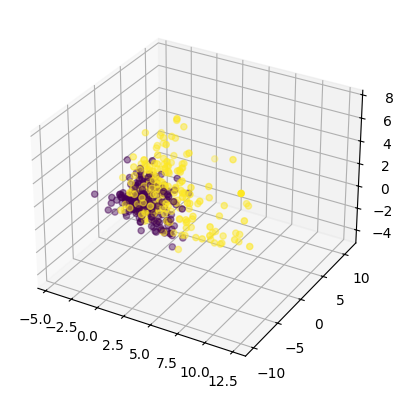

In [182]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
scal = StandardScaler()
X = scal.fit_transform(df[reduced_features])
X_transformed = pca.fit_transform(X)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_transformed[:,0], X_transformed[:,1],X_transformed[:,2], c=df["target"])

In [183]:
clf = make_pipeline(StandardScaler(),LogisticRegression(penalty=None, solver="newton-cg"))
print(np.mean(cross_val_score(clf, df[reduced_features], df["target"], cv = 10, scoring="accuracy")))

0.7899999999999999


In [197]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import  StandardScaler
parameters = {"logisticregression__penalty":["l1", "l2", None], 
              "logisticregression__C": [0.001, 0.01, 0.1, 1, 10], 
             }
clf = make_pipeline(StandardScaler(),LogisticRegression(penalty="l1", solver="liblinear"))

grid = GridSearchCV(clf, param_grid=parameters, cv=10)
grid.fit(df[reduced_features], df["target"]);

/home/frost/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/frost/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/frost/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/frost/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/frost/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/frost/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWar

In [185]:
grid.best_score_

0.8032850241545895

In [186]:
grid.best_params_

{'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}

By selecting features through lasso, we increased the score by a lot. We also reduced the complexity because there are a lot less features to consider.